# Proyek Analisis Data: Bike Sharing
- **Nama:** Diva Maharani Adila
- **Email:** divaadila01@gmail.com
- **ID Dicoding:** divaadila

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara pengguna casual dengan pengguna registered?
- Apakah ada peningkatan penyewaan sepeda dari tahun 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Jumlah pengguna registered lebih banyak daripada jumlah pengguna casual
- Pengguna registered lebih banyak melakukan penyewaan pada hari kerja, sedangkan pengguna casual lebih banyak melakukan penyewaan pada akhir pekan

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dari hasil menggunakan method info() menunjukkan bahwa terdapat kesalahan tipe data pada dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object
- Dari hasil menggunakan method isna() menunjukkan bahwa tidak ditemukan missing values atau nilai yang hilang dari dataset
- Dari hasil menggunakan method duplicated() menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset

### Cleaning Data

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data pada kolom dteday telah berhasil diubah menjadi datetime menggunakan function to_datetime(), sehingga lebih sesuai untuk analisis data berbasis waktu.
- Semua kolom telah merepresentasikan tipe datanya dengan tepat sesuai dengan fungsinya dan siap untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

print(f"Total pengguna casual: {total_casual}")
print(f"Total pengguna registered: {total_registered}")

Total pengguna casual: 620017
Total pengguna registered: 2672662


In [13]:
mean_casual = day_df['casual'].mean()
mean_registered = day_df['registered'].mean()

print(f"Rata-rata pengguna casual: {mean_casual:.2f}")
print(f"Rata-rata pengguna registered: {mean_registered:.2f}")

Rata-rata pengguna casual: 848.18
Rata-rata pengguna registered: 3656.17


In [14]:
day_df['year'] = day_df['dteday'].dt.year
rental_by_year = day_df.groupby('year')['cnt'].sum().reset_index()
print(rental_by_year)

   year      cnt
0  2011  1243103
1  2012  2049576


**Insight:**
- Jumlah pengguna registered lebih banyak daripada jumlah pengguna casual
- Pengguna registered tidak hanya lebih banyak, tetapi juga secara rata-rata menyewa sepeda lebih sering dibandingkan dengan pengguna casual.
- Jumlah penyewaan tahun 2012 lebih banyak dari tahun 2011. Angka penyewaan meningkat dari 1.243.103 pada tahun 2011 menjadi 2.049.576 pada tahun 2012. Dari data yang ada, total penyewaan meningkat sebanyak 806473 unit

## Visualization & Explanatory Analysis

### Pertanyaan 1:

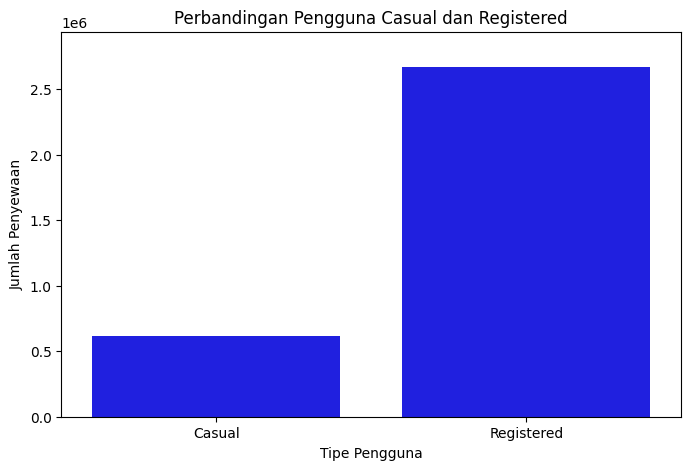

In [15]:
labels = ['Casual', 'Registered']
total_users = [total_casual, total_registered]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=total_users, color='blue')
plt.title('Perbandingan Pengguna Casual dan Registered')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Tipe Pengguna')
plt.ylim(0, max(total_users) * 1.1)
plt.show()

### Pertanyaan 2:

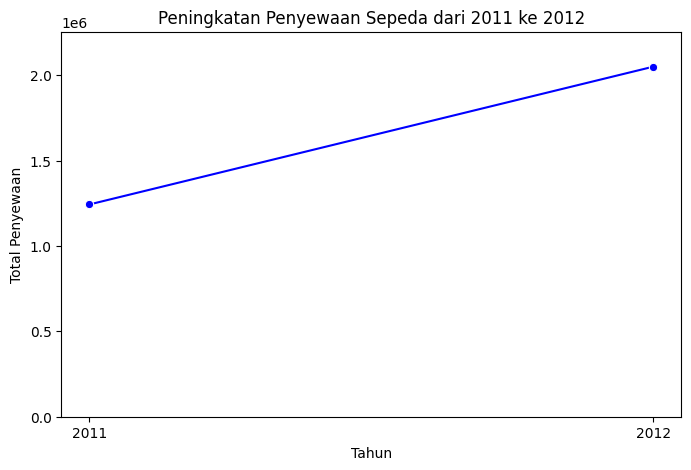

In [16]:
years = ['2011', '2012']
total_rentals = [1243103, 2049576]

plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=total_rentals, marker='o', color='blue')
plt.title('Peningkatan Penyewaan Sepeda dari 2011 ke 2012')
plt.ylabel('Total Penyewaan')
plt.xlabel('Tahun')
plt.xticks(years)
plt.ylim(0, max(total_rentals) * 1.1)
plt.show()

**Insight:**
- Dari analisis visualisasi yang dilakukan, dapat dilihat bahwa pengguna registered jauh lebih tinggi yang menunjukkan bahwa banyak yang lebih tertarik menjadi pengguna terdaftar daripada pengguna biasa
- Dari analisis visualisasi yang dilakukan, dapat dilihat bahwa ada peningkatan jumlah penyewaan sepeda dari tahun 2011 hingga tahun 2012

## Analisis Lanjutan (Opsional)

## Conclusion

- Dapat disimpulkan bahwa pengguna registered jauh lebih banyak dibandingkan pengguna casual, dengan total pengguna registered mencapai 2.672.662, sedangkan pengguna casual hanya 620.017. Hal ini menunjukkan bahwa lebih banyak orang yang tertarik menjadi pengguna registered. Belum diketahui secara pasti alasannya, namun kemungkinan besar pengguna registered mendapat keuntungan lebih daripada pengguna casual
- Dapat disimpulkan bahwa terdapat peningkatan jumlah penyewaan dari tahun 2011 sampai tahun 2012, dengan total penyewaan mencapai 1.243.103 pada tahun 2011 dan meningkat menjadi 2.049.576 pada tahun 2012. Ini menunjukkan peningkatan sebanyak 806.473 unit lebih banyak dibandingkan tahun 2011. Peningkatan ini mencerminkan pertumbuhan yang signifikan dalam penggunaan sepeda sebagai alternatif transportasi, serta menunjukkan kesadaran masyarakat untuk memilih sepeda sebagai alternatif transportasi yang ramah lingkungan dan bebas polusi.


In [17]:
day_df.to_csv("day.csv", index=False)